In [6]:
import pandas as pd

data = pd.read_csv("/content/IRIS.csv")

In [7]:
data.shape

(150, 5)

In [8]:
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
data["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

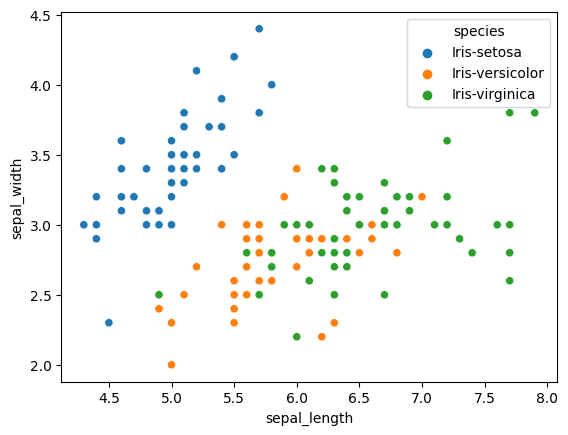

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='species' )
plt.show()

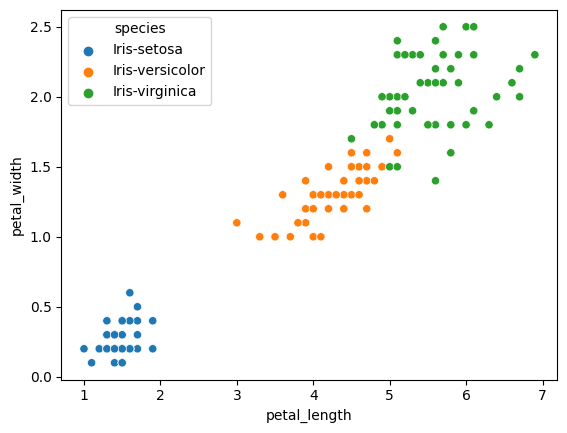

In [12]:
sns.scatterplot(data=data, x='petal_length', y='petal_width', hue='species' )
plt.show()

In [13]:
print(data.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [14]:
features = data[["sepal_length","sepal_width","petal_length","petal_width"]]
target = data["species"]

print(features.head())
print(target.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [15]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
nfeatures = mms.fit_transform(features)
print(nfeatures[:10])

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]]


In [16]:
#comupte N
N = int(len(data) ** 0.5)
if N % 2 == 0:
	N = N+1
print(N)

13


In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(nfeatures,target,test_size=0.3,random_state=120)

In [18]:
print("xtrain shape : ", x_train.shape)
print("xtest shape  : ", x_test.shape)
print("ytrain shape : ", y_train.shape)
print("ytest shape  : ", y_test.shape)

xtrain shape :  (105, 4)
xtest shape  :  (45, 4)
ytrain shape :  (105,)
ytest shape  :  (45,)


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

model = KNeighborsClassifier(n_neighbors=N,metric="euclidean")
model.fit(x_train,y_train)
cr = classification_report(y_test,model.predict(x_test))
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [20]:
pred = model.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df.head(20)

,Actual,Predicted
62,Iris-versicolor,Iris-versicolor
142,Iris-virginica,Iris-virginica
86,Iris-versicolor,Iris-versicolor
80,Iris-versicolor,Iris-versicolor
100,Iris-virginica,Iris-virginica
45,Iris-setosa,Iris-setosa
124,Iris-virginica,Iris-virginica
51,Iris-versicolor,Iris-versicolor
85,Iris-versicolor,Iris-versicolor
120,Iris-virginica,Iris-virginica


In [21]:
#predict

sl = float(input("enter sepal length: "))
sw = float(input("enter sepal width: "))
pl = float(input("enter petal length: "))
pw = float(input("enter petal width: "))
d = [[sl,sw,pl,pw]]
nd = mms.transform(d)
ans = model.predict(nd)
print("Predicted speice is = " , ans[0])

enter sepal length: 6.0
enter sepal width: 3.0
enter petal length: 5
enter petal width: 1.5
Predicted speice is =  Iris-versicolor


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
